In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Nevalytas NCBI datasetas. Toks koks atsisiustas

In [2]:
df = pd.read_csv("ncbi_full.csv")
df.shape

(41678, 12)

### Valom dataseta. Atmetam sgenus kuriuose yra netinkamos raides ['R', 'M', "S", "B", "H", "N", "Y", "K", "W", "D", "V"]

In [3]:
df_good = pd.read_csv("ncbi_good.csv") 
df_good.shape

(38462, 12)

### Sgenai kuriuose yra netinkamos raides

In [4]:
letters = ['R', 'M', "S", "B", "H", "N", "Y", "K", "W", "D", "V"]
df_bad = df[df['sgene_nucleotide'].str.contains("|".join(letters))]
for letter in letters:
    df_bad[letter] = df_bad['sgene_nucleotide'].str.count(letter)

<ipython-input-4-93f1acd6a130>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad[letter] = df_bad['sgene_nucleotide'].str.count(letter)


In [5]:
bars = {}
for letter in letters:
    c = df_bad[df_bad[letter]>0][letter].count()
    print(f'{letter} {c}')
    bars[letter]=c

R 264
M 115
S 67
B 2
H 3
N 2512
Y 453
K 214
W 93
D 3
V 25


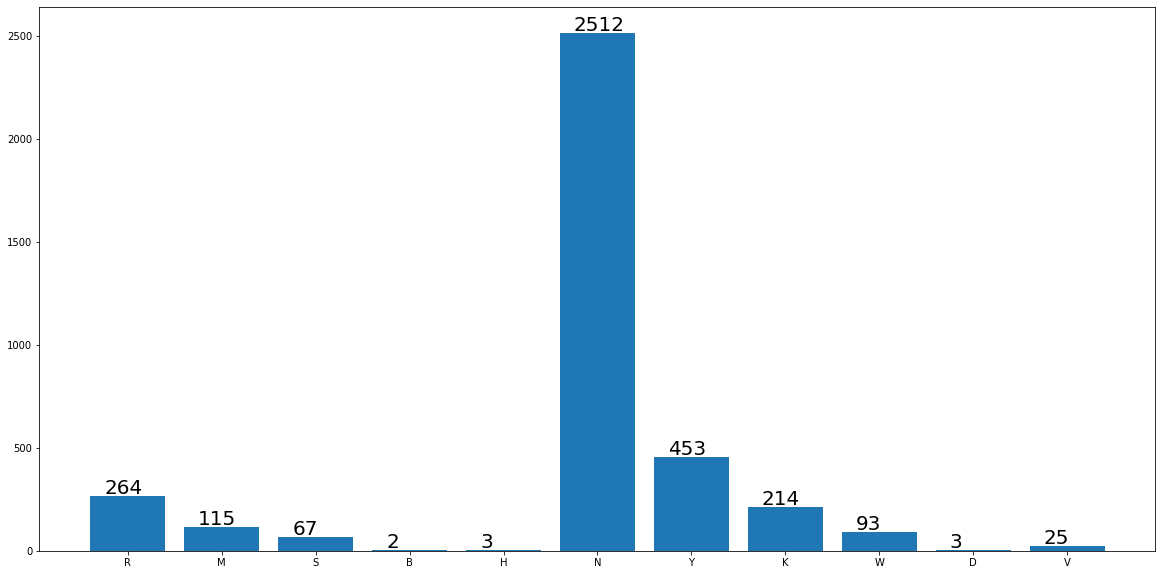

In [6]:
plt.figure(figsize=(20,10))
plt.bar(bars.keys(), bars.values())
for i, v in enumerate(bars.values()):
    plt.text(x=i-0.25 , y=v+10 , s=f"{v}", fontsize=20)

### Atmetam duplikatus

In [7]:
df_good_unique = pd.read_csv("ncbi_sgene_good_unique.csv")
df_good_unique.shape

(4384, 4)

### Duplikatu daznis. Kiek kokie sgenai kartojasi ir kokie sgenai dominuoja datasete

In [8]:
# Reference seka
df_good_unique[df_good_unique['accessions'].str.contains("NC_045512.2")]

,sgene_nucleotide,accessions,accessions_count,accession
1040,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,MN908947.3|NC_045512.2|MN985325.1|MN975262.1|M...,2246,2246_6593532f926e48cc68421ef20a33018c


In [9]:
# Daugiausiai duplikatu turintis sgenas
df_good_unique[df_good_unique['accessions_count']==14235]

,sgene_nucleotide,accessions,accessions_count,accession
1463,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...,MT192765.1|MT246490.1|MT246487.1|MT246484.1|MT...,14235,14235_f80cc4d05210a1a15c01a68e9a321ffa


In [10]:
duplicate_occurrences = df_good_unique.groupby(['accessions_count']).size()

In [11]:
duplicate_occurrences

accessions_count
1        2890
2         568
3         243
4         133
5          84
         ... 
316         1
1033        1
2246        1
5407        1
14235       1
Length: 78, dtype: int64

In [12]:
# yra 2890 sgenai, kurie nesikartoja ir yra unikalus
# yra 568 sgenai, kurie kartojasi po 2 kartus
# yra 84 sgenai, kurie kartojasi po 5 kartus
# yra 1 sgenas kuris kartojasi 14235 kartus

In [13]:
dx = duplicate_occurrences.index

x = list(map(str, dx))
y = duplicate_occurrences.tolist()

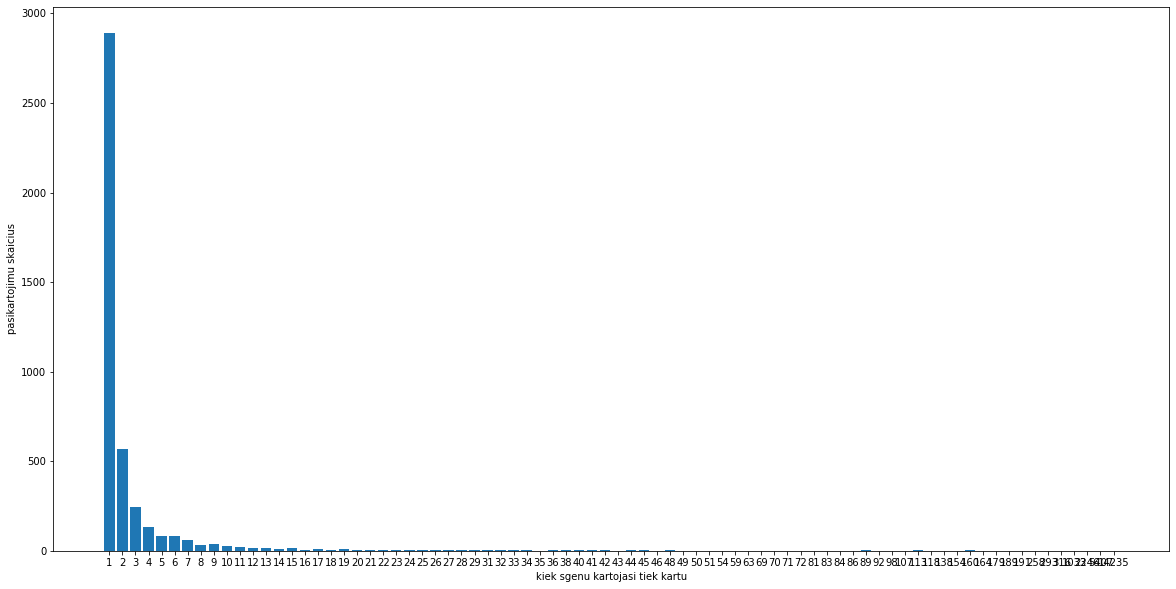

In [14]:
plt.figure(figsize=(20,10))
plt.bar(x, y)   
plt.xlabel("kiek sgenu kartojasi tiek kartu")
plt.ylabel("pasikartojimu skaicius")
plt.show()

### Kaupiamoji suma. Sgenu duplikatu dominavimas datasete
staigi uodega i virsu rodo, kad yra keletas sgenu kurie turi labai daug duplikatu
trumpa X asis ir lygi horizontali lija (ascii menas apacioj) butu idealu, tai rodytu, kad mazai sgenu turi duplikatus.

```
--------------
|
|
|
1 2 3 4 ... 10 
```

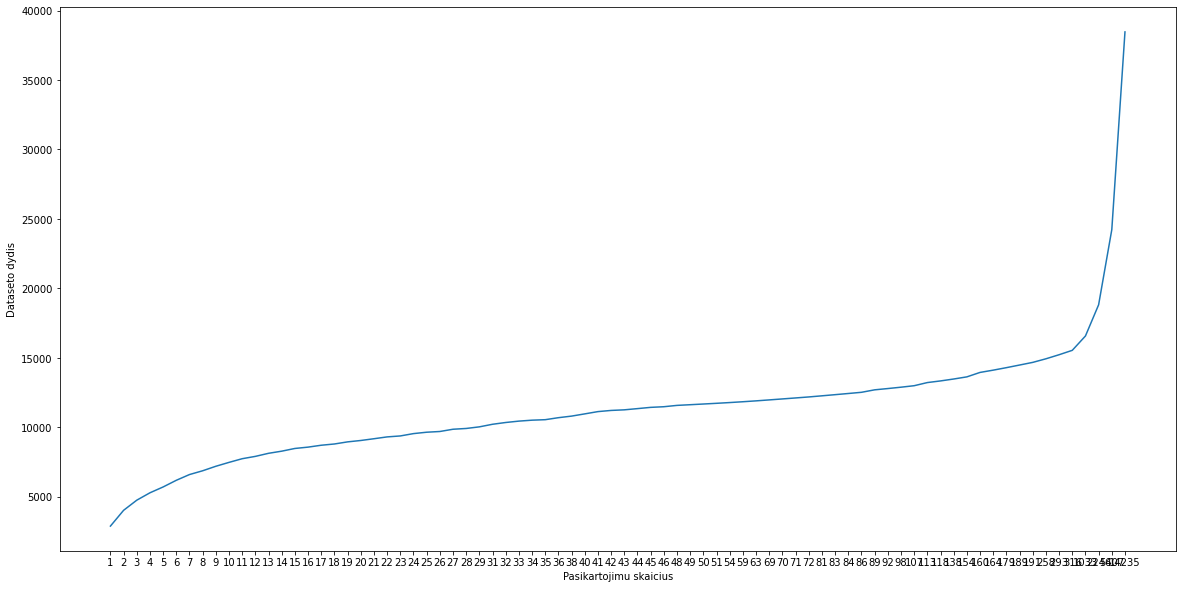

In [15]:
cy = [] 
for _x, _y in zip(dx, y):
    prev = cy[-1] if cy else 0
    cy.append(prev + _y*_x)
    
plt.figure(figsize=(20,10))    
plt.xlabel("Pasikartojimu skaicius")
plt.ylabel("Dataseto dydis")
plt.plot(x, cy)
plt.show()

# pandas profiling

In [16]:
from pandas_profiling import ProfileReport

In [20]:
df.head()

,accession,protein_accession,collection_date,sgene_begin,sgene_end,location,region,genome,genome_desc,sgene_protein,sgene_protein_desc,sgene_nucleotide
0,MN908947.3,QHD43416.1,2019-12,21563,25384,China,Asia,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Severe acute respiratory syndrome coronavirus ...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1-1273 surface glycoprotein [organism=Severe a...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
1,NC_045512.2,YP_009724390.1,2019-12,21563,25384,China,Asia,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Severe acute respiratory syndrome coronavirus ...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1-1273 surface glycoprotein [organism=Severe a...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
2,MN985325.1,QHO60594.1,2020-01-19,21563,25384,USA,North America,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Severe acute respiratory syndrome coronavirus ...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1-1273 surface glycoprotein [organism=Severe a...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
3,MN975262.1,QHN73810.1,2020-01-11,21563,25384,China,Asia,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,Severe acute respiratory syndrome coronavirus ...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1-1273 surface glycoprotein [organism=Severe a...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
4,MN938384.1,QHN73795.1,2020-01-10,21531,25352,China: Shenzhen,Asia,CAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTT...,Severe acute respiratory syndrome coronavirus ...,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,1-1273 surface glycoprotein [organism=Severe a...,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...


In [29]:
df_profiling = df[['accession', 'collection_date', 'location', 'region', 'sgene_nucleotide']].copy()
df.shape

(41678, 12)

In [30]:
df_profiling.head()

,accession,collection_date,location,region,sgene_nucleotide
0,MN908947.3,2019-12,China,Asia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
1,NC_045512.2,2019-12,China,Asia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
2,MN985325.1,2020-01-19,USA,North America,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
3,MN975262.1,2020-01-11,China,Asia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...
4,MN938384.1,2020-01-10,China: Shenzhen,Asia,ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTG...


In [31]:
profile = ProfileReport(df_profiling, title="Pandas Profiling Report")

In [18]:
#profile.to_notebook_iframe()

In [32]:
profile.to_file("pandas_profiling.html")

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Kuriose sgeno vietose vyksta mutacijos

In [33]:
import seaborn as sns

In [41]:
sgene = df_good_unique['sgene_nucleotide'].str.split('',expand=True)

In [42]:
sgene.head()

,0,1,2,3,4,5,6,7,8,9,...,3841,3842,3843,3844,3845,3846,3847,3848,3849,3850
0,,A,G,T,C,T,C,T,A,G,...,None,None,None,None,None,None,None,None,None,None
1,,A,T,G,C,T,T,G,T,T,...,None,None,None,None,None,None,None,None,None,None
2,,A,T,G,T,A,T,G,T,T,...,None,None,None,None,None,None,None,None,None,None
3,,A,T,G,T,T,A,G,T,T,...,None,None,None,None,None,None,None,None,None,None
4,,A,T,G,T,T,A,G,T,T,...,None,None,None,None,None,None,None,None,None,None


In [64]:
y = sgene.nunique()

In [71]:
y.value_counts()

4    3300
3     487
2      32
1      21
5      11
dtype: int64

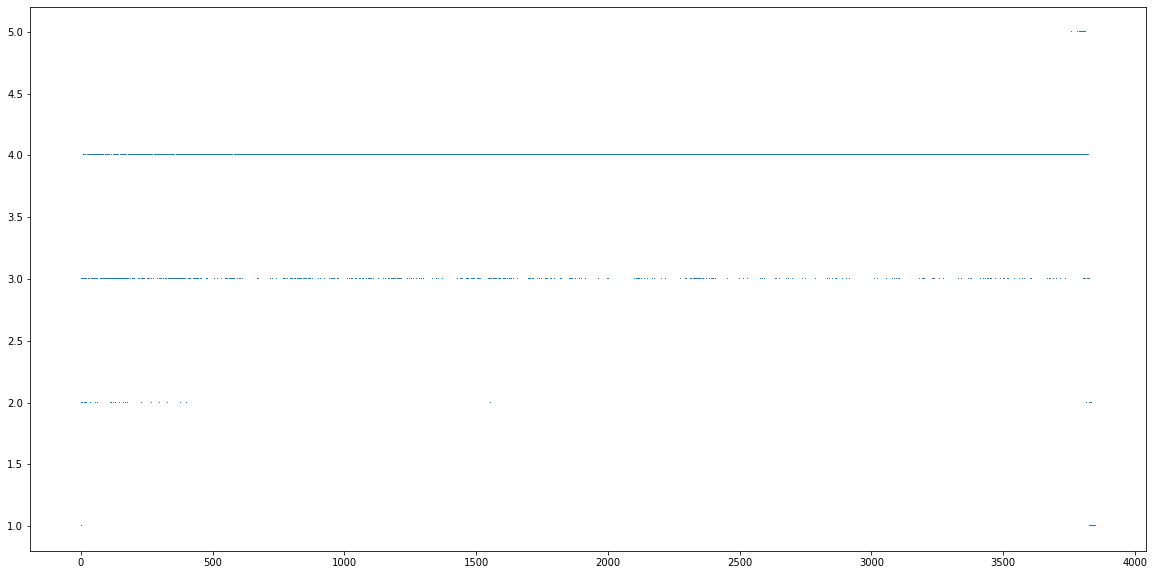

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(list(range(len(y))), y, marker=',',lw=0,s=1)
plt.show()

In [53]:
y

0       1
1       2
2       3
3       3
4       3
       ..
3846    1
3847    1
3848    1
3849    1
3850    1
Length: 3851, dtype: int64

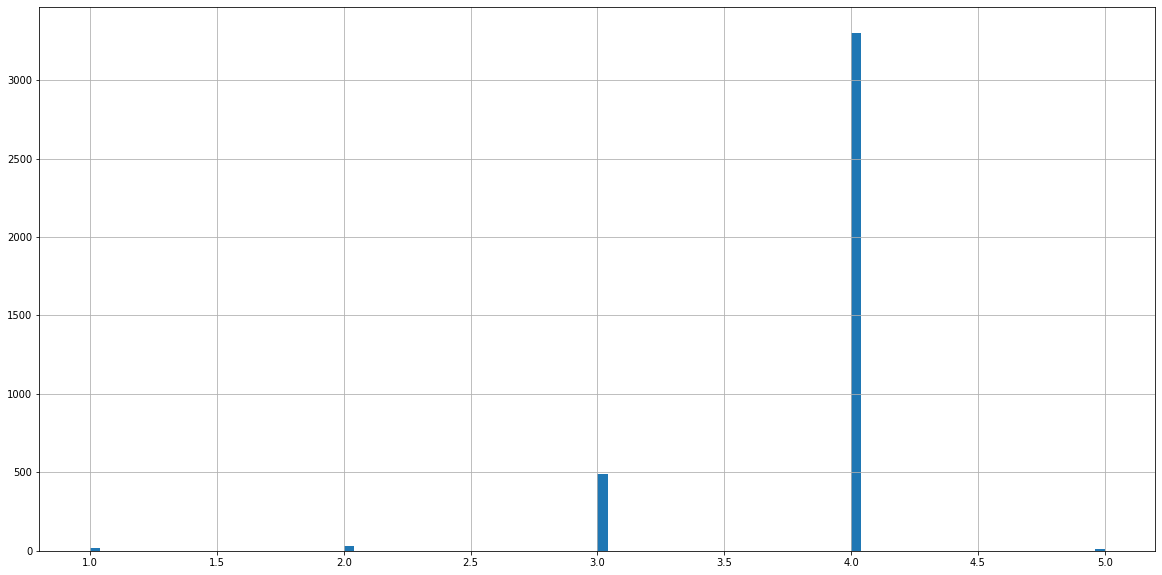

In [52]:

y.hist(bins=100, figsize=(20,10))

In [39]:
sns.heatmap(sgene)

ValueError: could not convert string to float: ''